In [1]:
print('컴퓨터공학과 문지현 1771093')

컴퓨터공학과 문지현 1771093


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.data)

# 4개의 특징 이름을 출력한다. 
print('iris.feature_names\n',iris.feature_names)

# 정수는 꽃의 종류를 나타낸다
print('\n꽃의 종류: 0 = setosa, 1=versicolor, 2=virginica')
print(iris.target)

print(iris.DESCR)

iris.feature_names
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

꽃의 종류: 0 = setosa, 1=versicolor, 2=virginica
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== 

In [3]:
#학습 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

#kNN 알고리즘으로 학습 및 분류하기 (k=6)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('y_pred: ',y_pred)
scores = metrics.accuracy_score(y_test, y_pred)
print('scores: ',scores)

(120, 4)
(30, 4)
y_pred:  [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]
scores:  0.9666666666666667


In [4]:
#새로운 데이터로 예측하기
#사용 가능한 모든 데이터를 사용해서 모델을 학습
#새로운 데이터를 가지고 예측

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자.
x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


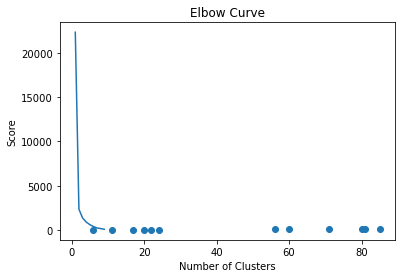

In [5]:
#k를 결정하는 방법

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
[85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0],X[:,1])

n_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]

# 모든 샘플에 대하여 제곱 오차를 계산하여 리스트에 추가한다.
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(n_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


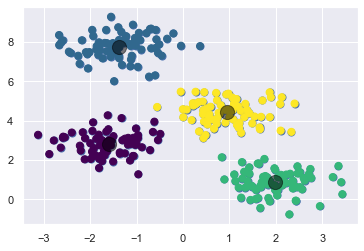

In [6]:
#K-means 알고리즘 실습

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

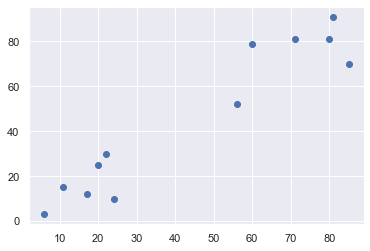

In [7]:
#sklearn을 이용한 K-means 클러스터링

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
[85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0],X[:,1])

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

#생성한 클러스터의 중심값 출력
print(kmeans.cluster_centers_)

[[72.16666667 75.66666667]
 [16.66666667 15.83333333]]
